# Useful scripts for working with post data

### Filtered wordcloud, table and lollipop diagram

### Filter master table by location ID, start and end date

In [1]:
start_date = "01-01-2010" # Day/Month/Year, greater than
end_date = "01-01-2020" # smaller than
locID = 291797571

# file outname
doutname = str(locID) + "_" + start_date + "_bis_"+ end_date

# will create new directory /results

### Generate tables and wordclouds first

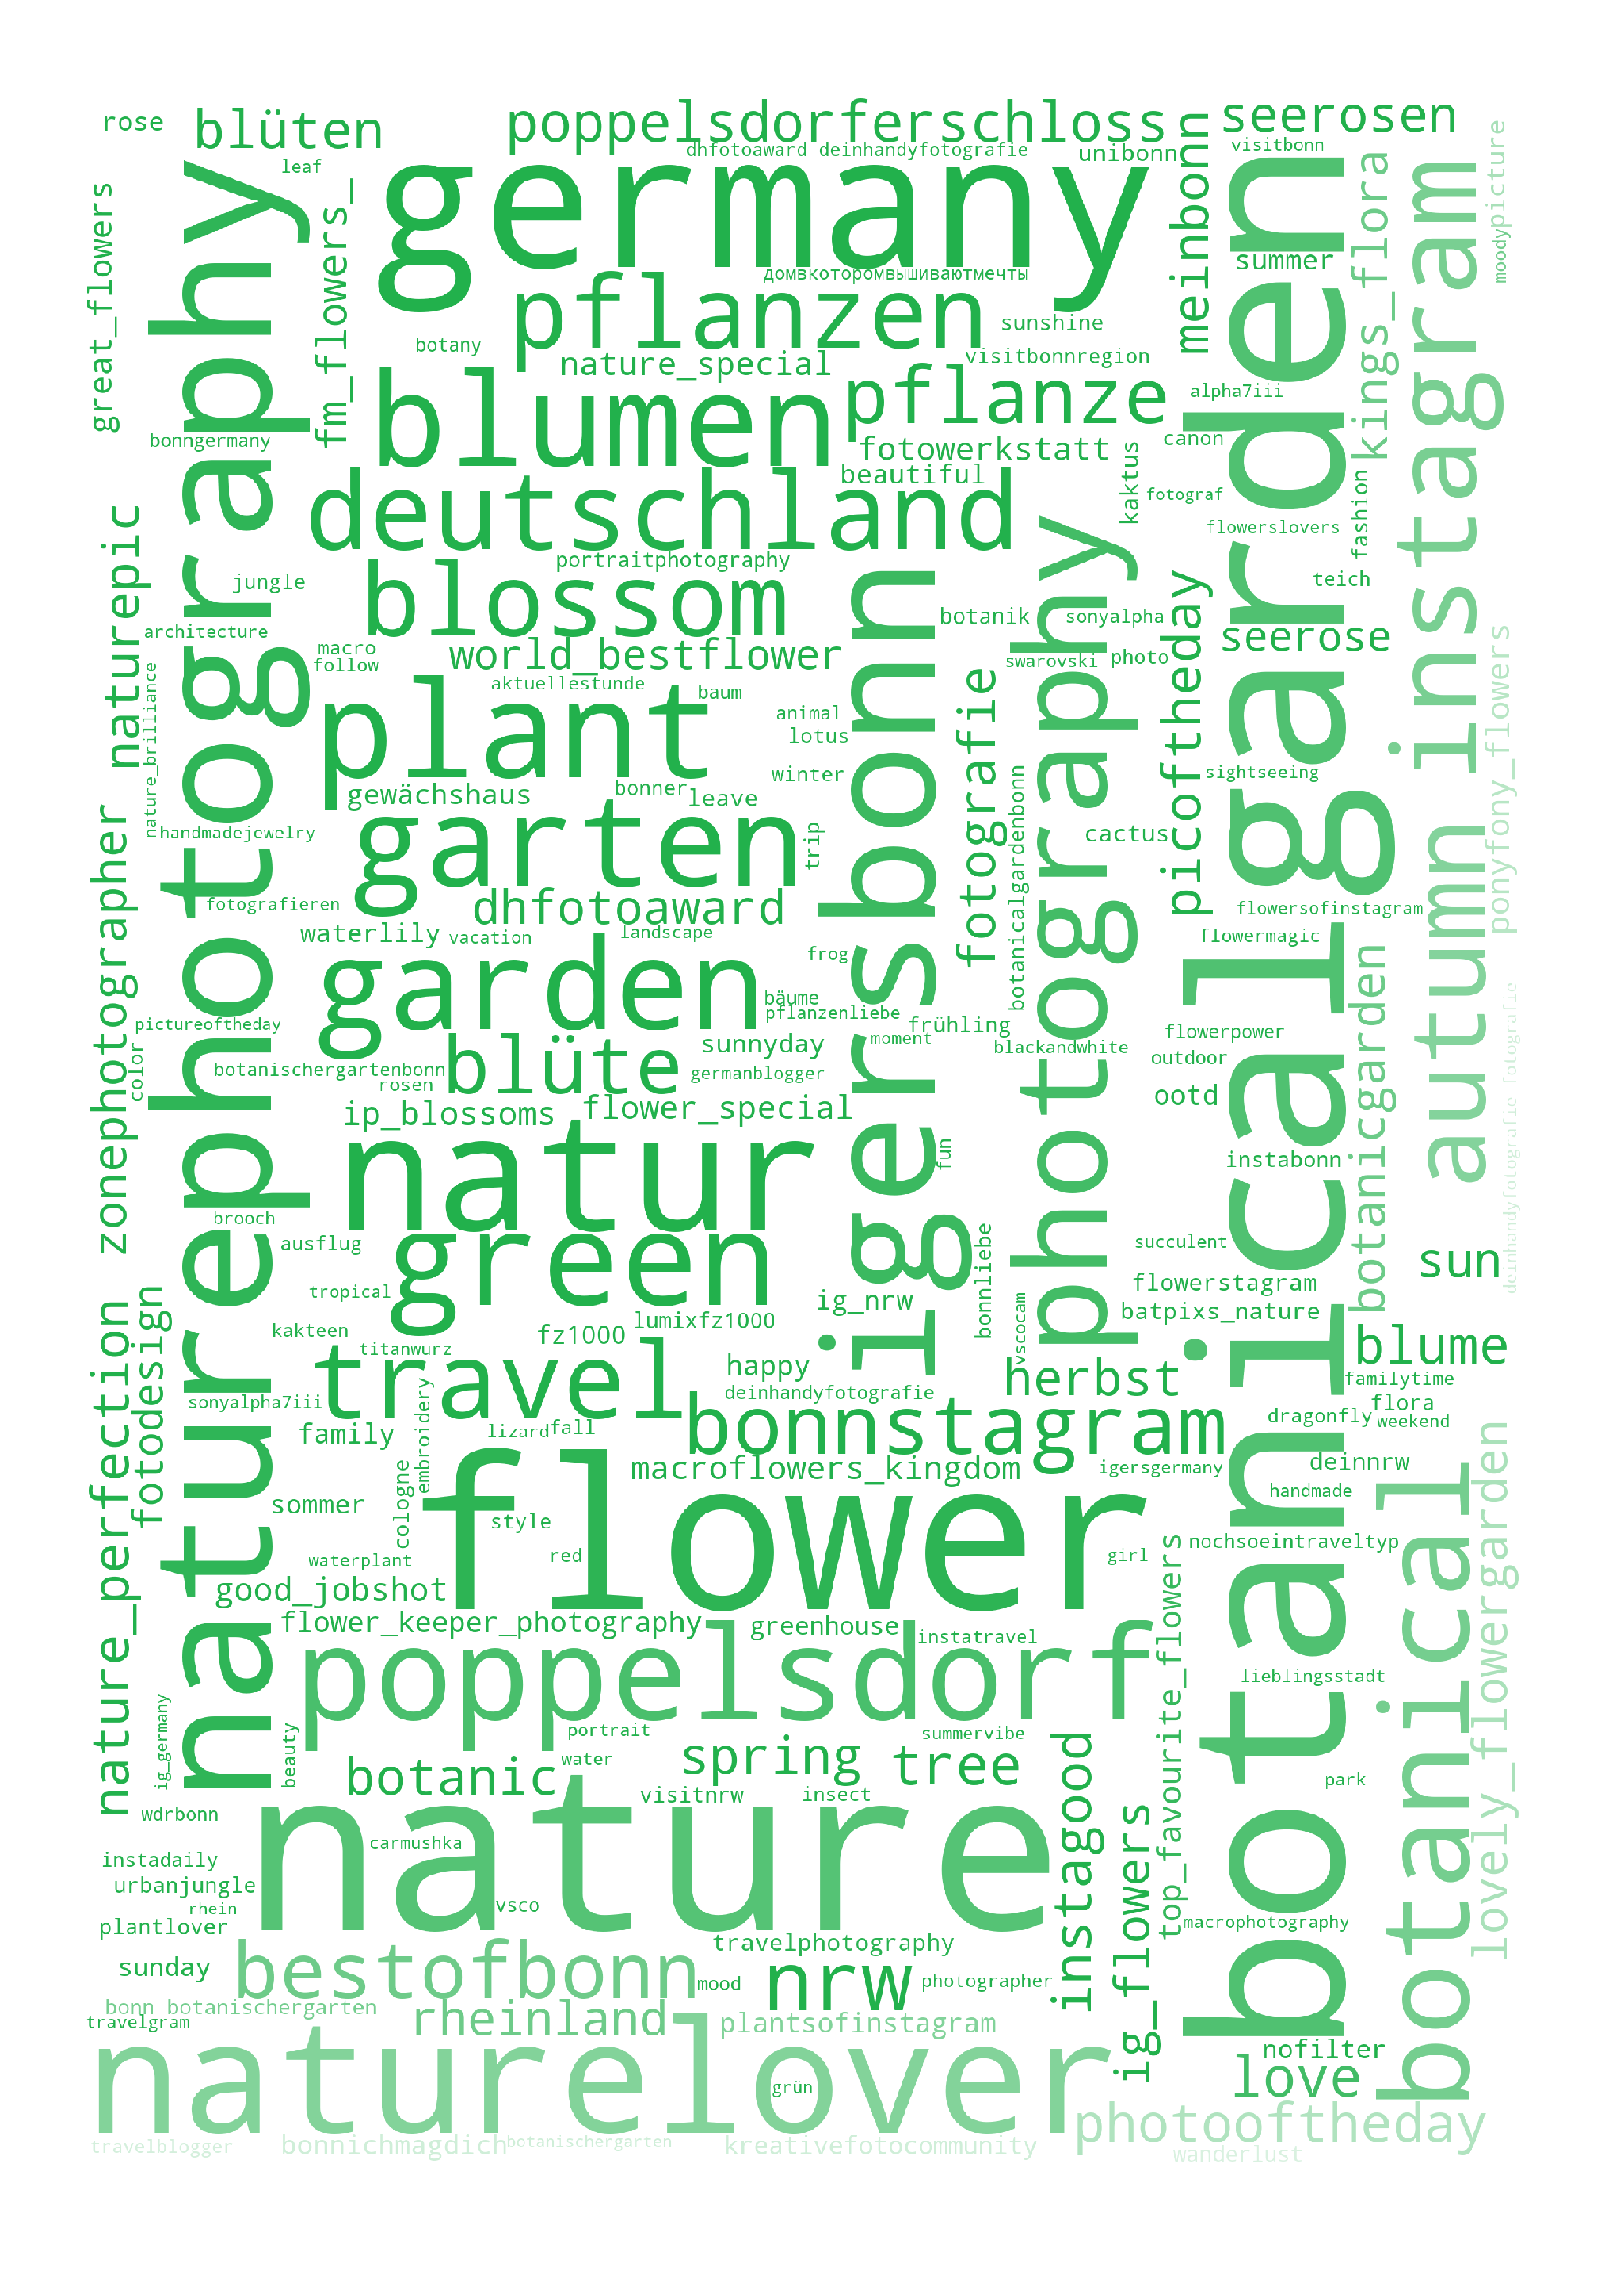

In [2]:

# go through existing, unparsed df. String must be converted to list first with ast 
import collections
from datetime import datetime
import pandas as pd
import ast
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator   
from PIL import Image  
import numpy as np  
import matplotlib.pyplot as plt  
from random import shuffle

df = pd.read_excel("Posttable.xlsx")

# convert regular date to timestamp
def date_to_stamp(date_string):
    date = datetime.strptime(date_string, "%d-%m-%Y")
    timestamp = int(datetime.timestamp(date))
    return timestamp
    
start = date_to_stamp(start_date)
end = date_to_stamp(end_date)

tf = df.loc[start<df.taken_at_timestamp].loc[end>df.taken_at_timestamp]
nf = tf.loc[locID==tf.location_id]

def astme(w):
    try:
        return ast.literal_eval(w)
    except:
        return []

alltags = []
for index, row in nf.iterrows():
    temptags = []

    # if cell is a list, append
    if isinstance(astme(row.tags), list):
        temptags = temptags + astme(row.tags)
    if isinstance(astme(row["text_hashtags"]), list):
        temptags = temptags + astme(row["text_hashtags"])

    # important: use "set" to get every unique hashtag once only per post/row
    alltags = alltags + list(set(temptags))

# lower for later comparison
alltagslower = [ht.lower() for ht in alltags]

# define stopwords, i.e. park names
stopwords = [
 'bonn',
 'freizeitparkrheinaue',
 'hofgarten',
 'botanischergarten',
 'poppelsdorferallee',
 'rigal’schewiese',
 'rigal´schewiese',
 'rigal\'schewiese',
 'rigalschewiese',
 'stadtgarten',
 'panoramapark',
 'kaiserplatz',
 'baumschulwäldchen',
 'kurparkbadgodesberg',
 'kurpark',
 'rheinaue',
    # bonn prefix
 'bonnfreizeitparkrheinaue',
 'bonnhofgarten',
 'bonnbotanischergarten',
 'bonnpoppelsdorferallee',
 'bonnrigal’schewiese',
 'bonnrigal´schewiese',
 'bonnrigal\'schewiese',
 'bonnrigalschewiese',
 'bonnstadtgarten',
 'bonnpanoramapark',
 'bonnkaiserplatz',
 'bonnbaumschulwäldchen',
 'bonnkurparkbadgodesberg',
 'bonnkurpark',
 'bonnrheinaue'
    #same with bonn suffix
 'freizeitparkrheinauebonn',
 'hofgartenbonn',
 'botanischergartenbonn',
 'poppelsdorferalleebonn',
 'rigal’schewiesebonn',
 'rigal´schewiesebonn',
 'rigal\'schewiesebonn',
 'rigalschewiesebonn',
 'stadtgartenbonn',
 'panoramaparkbonn',
 'kaiserplatzbonn',
 'baumschulwäldchenbonn',
 'kurparkbadgodesbergbonn',
 'kurparkbonn',
 'rheinauebonn']

cleaned_tags = [ x for x in alltagslower if x not in stopwords ]

# export pandas dataframe with tag and count
mf = pd.DataFrame(collections.Counter(cleaned_tags).most_common(),columns=["tag","count"])
mf.to_excel("Results/" + doutname + "_table.xlsx",index=False)

dlist = []
for index, row in mf.iterrows():
    #print(row.tag)
    dlist = dlist + [str(row.tag)]*row["count"]
dlist

shuffle(dlist)
words = ' '.join(dlist) 

mask = np.array(Image.open("Rectangle.png"))  
image_colors = ImageColorGenerator(mask)  
  
def wordmap(words, mask):  
    word_cloud = WordCloud(width=2000, height=1000, max_words=200,  
                           background_color='white', stopwords=stopwords,  
                           mask=mask).generate(words)  
    plt.figure(figsize=(40,40),facecolor = 'white', edgecolor='blue')  
    plt.imshow(word_cloud.recolor(color_func=image_colors)) 
    plt.axis('off')  
    plt.tight_layout(pad=0)  
    plt.savefig("Results/" + doutname +"_wordcloud.png", format="png")  
    #plt.show()  
       
wordmap(words, mask) 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


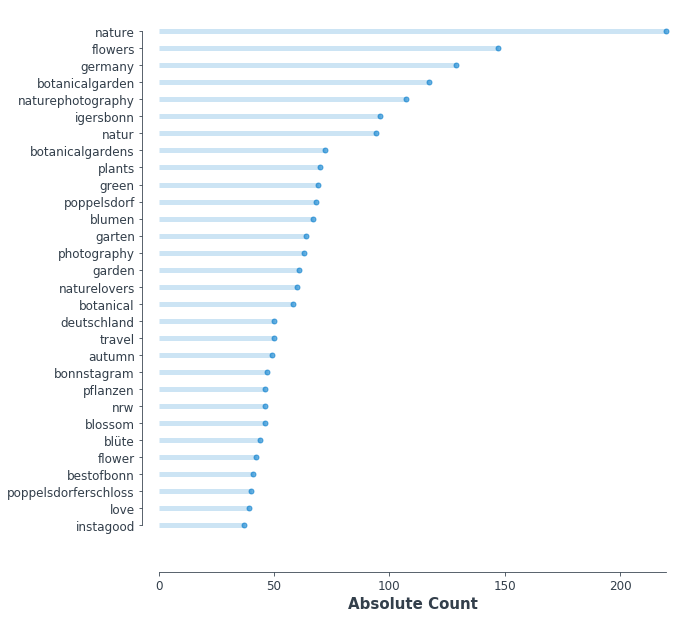

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
%matplotlib inline

# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

# sort values of dataframe
df = mf.set_index("tag").iloc[:30,:].sort_values(by='count')

# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(10,10))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['count'], color='#007ACC', alpha=0.2, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['count'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)

# set labels
ax.set_xlabel('Absolute Count', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
# fig.text(-0.23, 0.96, 'Transaction Type', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

# set the spines position
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))

plt.savefig("Results/" + doutname + "_lollipop.png", dpi=300, bbox_inches='tight')